In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mason_functions as mf
from pydataset import data

# Exercises Part I

In [2]:
#Use the iris database to answer the following quesitons:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


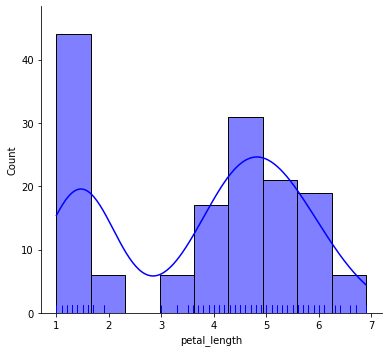

In [3]:
#Exercise 1 What does the distribution of petal lengths look like?
sql = """
SELECT *
FROM measurements
"""
url = get_db_url('iris_db')
measurements = pd.read_sql(sql, url)
measurements.info()
measurements.describe()

sns.displot(data = measurements, x = 'petal_length', color = 'blue', aspect = 1.1, kde = True, rug = True)

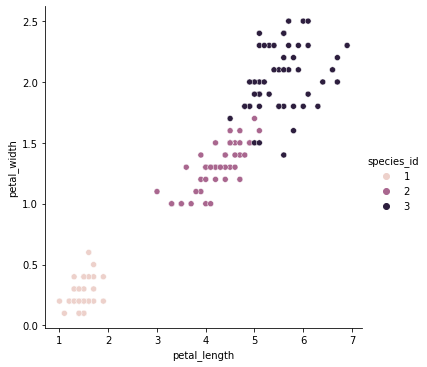

In [4]:
#Exercise 2 Is there a correlation between petal length and petal width?
sns.relplot(data = measurements, x = 'petal_length', y = 'petal_width', hue = 'species_id')
#there is a positive correlation

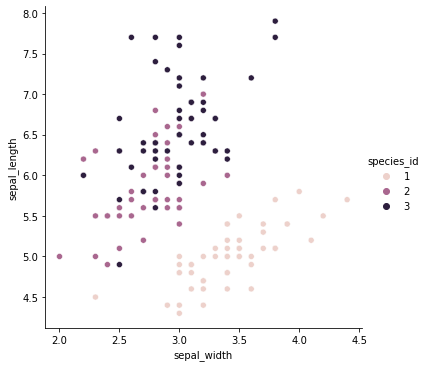

In [5]:
#Exercise 3 Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data = measurements, x = 'sepal_width', y = 'sepal_length', hue = 'species_id')
#not really, no

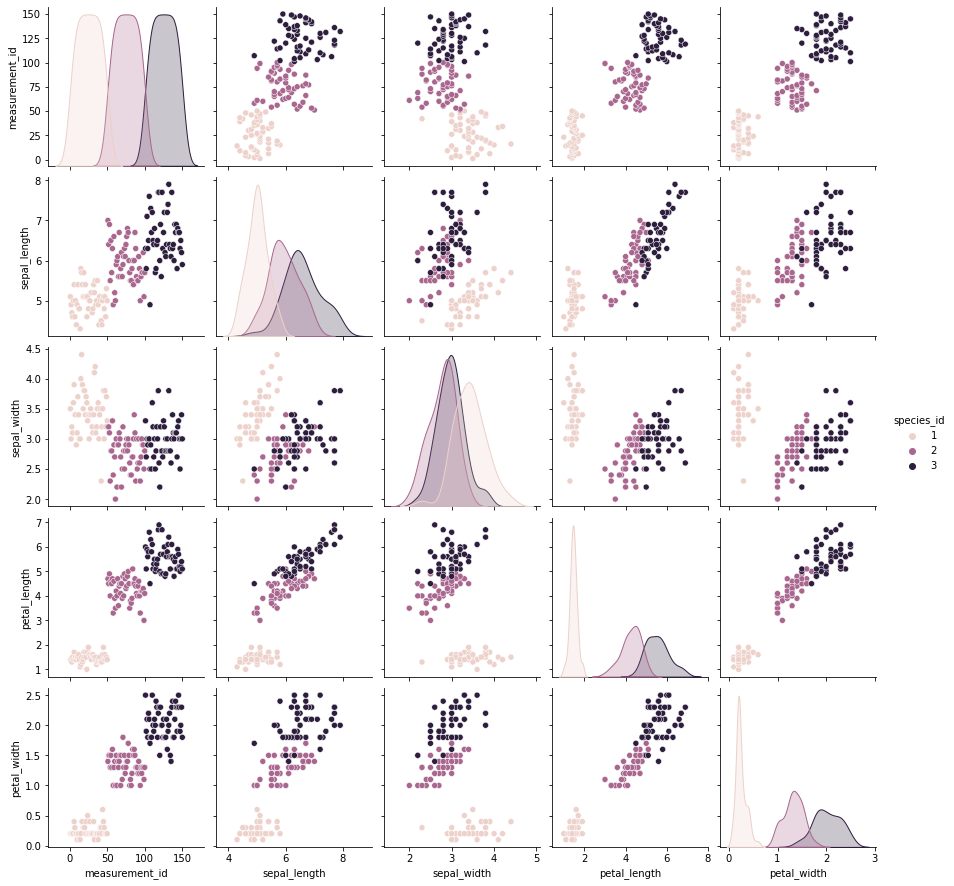

In [6]:
#Exercise 4 Which features would be best used to predict species?
sns.pairplot(data = measurements, hue = 'species_id')
#petal length and petal width

# Exercises Part II

# Exercise 1

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [7]:
anscombe = sns.load_dataset('anscombe')
anscombe.info()
anscombe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [8]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [9]:
anscombe.groupby('dataset').agg(['count', 'mean', 'median', 'max', 'min'])
#I notice all of the x values are integer-like and all of the y values are float-like.
#the mean is nearly the same for all datasets, it is the same for the x value, and it is damn near the same for the
#y values, the exception being dataset III, off by about .000909.
#all of the x summary statistics are the same or close across the different data sets, and all the y summary statistics
#are simply close across the datasets (besides the mean, which is practically identical across sets).
#there are 11 x-values and 11 y-values for each dataset

x                            y                              
        count mean median   max  min count      mean median    max   min
dataset                                                                 
I          11  9.0    9.0  14.0  4.0    11  7.500909   7.58  10.84  4.26
II         11  9.0    9.0  14.0  4.0    11  7.500909   8.14   9.26  3.10
III        11  9.0    9.0  14.0  4.0    11  7.500000   7.11  12.74  5.39
IV         11  9.0    8.0  19.0  8.0    11  7.500909   7.04  12.50  5.25

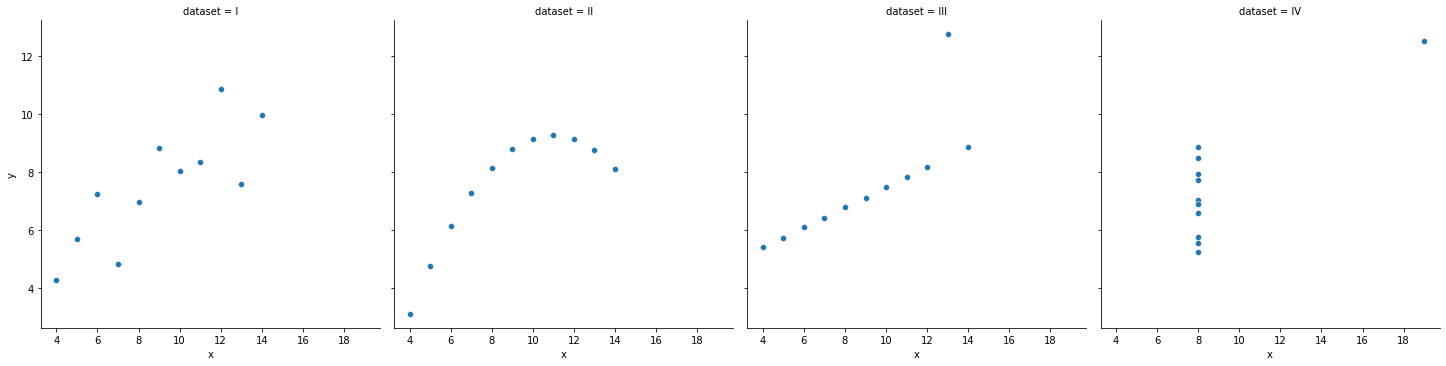

In [10]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

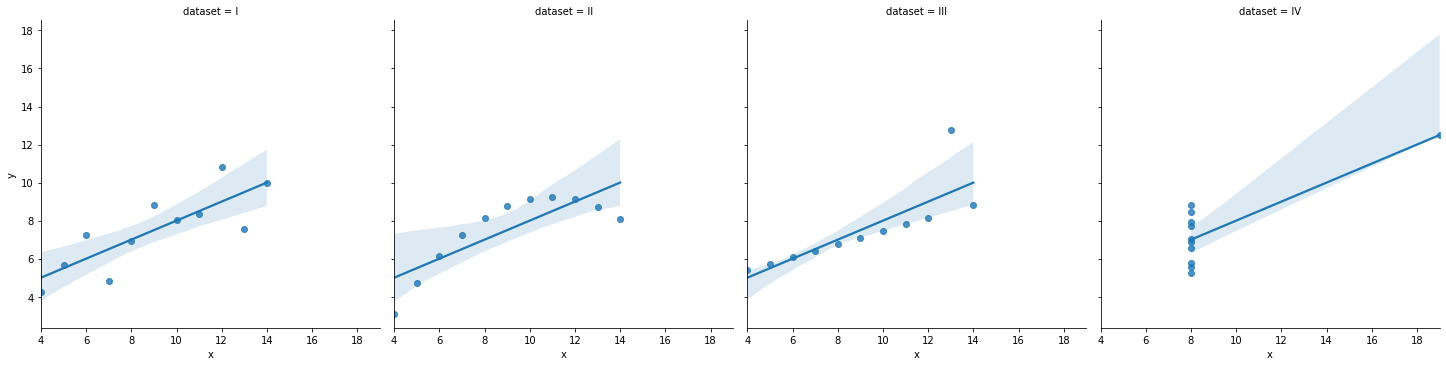

In [11]:
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

# Exercise 2

Exercise 2 Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [12]:
InsectSprays = data("InsectSprays")
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [13]:
InsectSprays.sample(5)
InsectSprays.value_counts('spray')

spray
A    12
B    12
C    12
D    12
E    12
F    12
dtype: int64

<AxesSubplot:xlabel='spray', ylabel='count'>

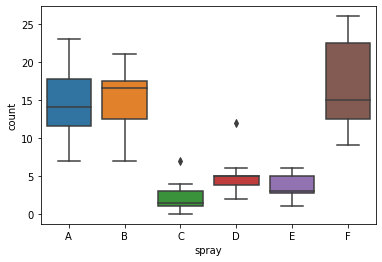

In [14]:
sns.boxplot(data = InsectSprays, x = 'spray', y = 'count')

# Exercise 3

Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
Does whether or not a province is Catholic influence fertility?
What measure correlates most strongly with fertility?


In [15]:
swiss = data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [16]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [17]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [18]:
swiss['is_catholic'] = swiss['Catholic'] >= 50
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


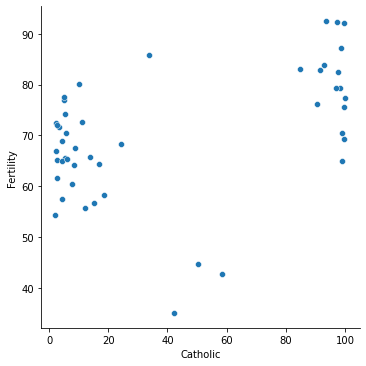

In [19]:
sns.relplot(data = swiss, x = 'Catholic', y = 'Fertility')
#no, there is no correlation between catholic and fertility measure

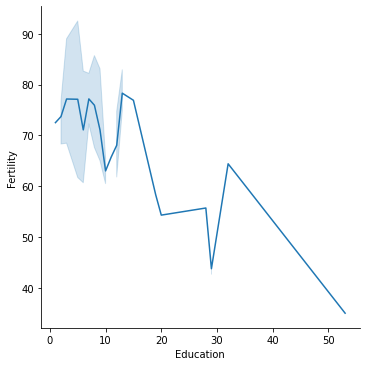

In [20]:
sns.relplot(data = swiss, y = 'Fertility', x = 'Education', kind = 'line')
#The education measure correlates most strongly with fertility

# Exercise 4

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [21]:
sql = """
SELECT * 
FROM orders
"""
url = get_db_url('chipotle')
chipotle = pd.read_sql(sql, url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [22]:
four_most_popular = chipotle.groupby('item_name').quantity.sum().nlargest(n = 4, keep = 'all')
four_most_popular
four_most_popular.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [23]:
chipotle['prices_as_floats'] = chipotle.item_price.apply(lambda x: mf.handle_commas(x))

In [24]:
total_revenue_per_item = chipotle.groupby('item_name').prices_as_floats.sum()
total_revenue_per_item

item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Bowl                                       29.60
Burrito                                    44.40
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Chicken Crispy Tacos                      472.13
Chicken Sa

In [25]:
bar_me = total_revenue_per_item[four_most_popular.index]
bar_me = bar_me.reset_index()
bar_me

,item_name,prices_as_floats
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

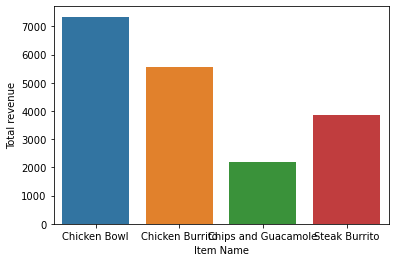

In [26]:
sns.barplot(data = bar_me, x = 'item_name', y = 'prices_as_floats')
plt.ylabel('Total revenue')
plt.xlabel('Item Name')
plt.tight_layout

# Exercise 5

Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [27]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [28]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [29]:
sleep.sample(5)

,Reaction,Days,Subject
178,343.2199,7,372
143,257.2424,2,369
175,287.1726,4,372
42,285.0000,1,331
31,321.5426,0,330


In [30]:
sleep['Subject'] = 'Subject_' + sleep.Subject.astype(str) 

Text(0.5, 0, 'Days Without Sleep')

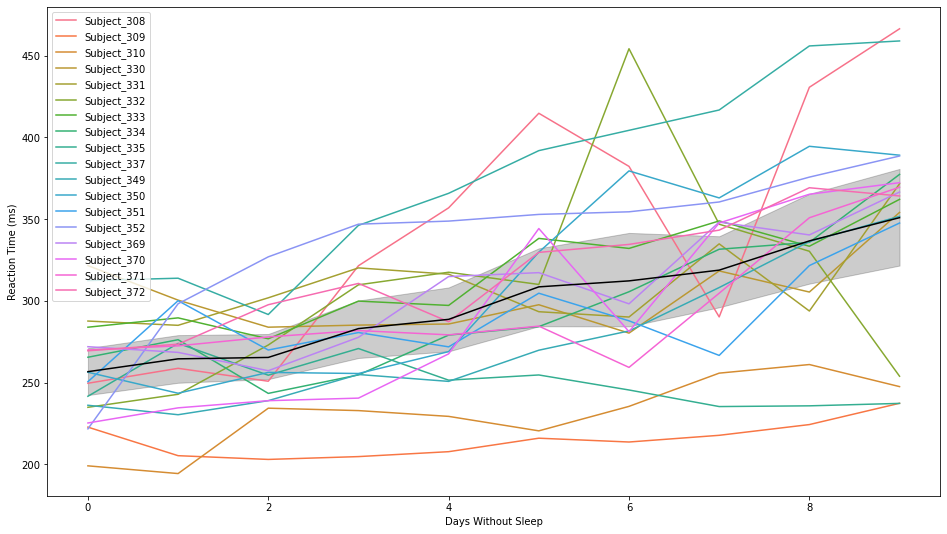

In [31]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = sleep, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleep, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')
plt.ylabel('Reaction Time (ms)')
plt.xlabel('Days Without Sleep')